## 2.1 vector and matrix computations

### 2.1.1 Vector computation

In [1]:
a = [1, 2, 3] # ベクトルに対してスカラー値を掛けると要素毎に値が掛け算されたベクトルが出力される
2 * a

3-element Vector{Int64}:
 2
 4
 6

In [2]:
b = [4, 5, 6]
a + b # ベクトルのサイズが同じであることが必要

3-element Vector{Int64}:
 5
 7
 9

In [3]:
a .* b # 対応する要素毎に掛け合わせたい場合は .* によってブロードキャストする

3-element Vector{Int64}:
  4
 10
 18

In [4]:
sum(a .* b) # 内積を行うには，上記の各要素の掛け算をsum関数で足し合わせる

32

In [5]:
a' * b # 内積は，1x3と3x1の行列の積と考えると記述がシンプルになる

32

### 2.1.2 Matrix computation

In [6]:
A = [1 2 3;
     4 5 6]
B = [10 20 30; 
     40 50 60]
A + B # 行列同士の和

2×3 Matrix{Int64}:
 11  22  33
 44  55  66

In [7]:
A = [1 2; 
     3 4;
     5 6] # 3x2行列
B = [10 20 30 40; 
     50 60 70 80] # 2x4行列　
C = A * B # 行列積(matrix product)

3×4 Matrix{Int64}:
 110  140  170  200
 230  300  370  440
 350  460  570  680

行列Cのi列j行目の要素は次式で計算される．
$$
C_{i, j} = \sum_{k = 1}^{K} A_{i, k} B_{k, j}
$$

In [8]:
M = size(A, 1) # Aの行数
N = size(B, 2) # Bの列数

# M x N の行列を作成
C = [sum(A[i,:] .* B[:,j]) for i in 1:M, j in 1:N]

3×4 Matrix{Int64}:
 110  140  170  200
 230  300  370  440
 350  460  570  680

In [9]:
B * A # 左側の行列の列数と右側の行列の行数が一致していないのでエラー（Dimension Mismatch)

LoadError: DimensionMismatch: matrix A has dimensions (2,4), matrix B has dimensions (3,2)

In [10]:
A = [1 2; 
     3 4; 
     5 6]
I = [1 0 0; 
     0 1 0;
     0 0 1]
I * A # A * Iではない

3×2 Matrix{Int64}:
 1  2
 3  4
 5  6

In [11]:
A = [1 2 3;
     4 5 6]
A' # Juliaでは転置を ' で表す

3×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4
 2  5
 3  6

In [12]:
a = [1, 2, 3]
b = [5, 7]
a * b'

3×2 Matrix{Int64}:
  5   7
 10  14
 15  21

In [13]:
f2(x, y) = 2*x + y
f2.(a, b')

3×2 Matrix{Int64}:
  7   9
  9  11
 11  13

In [14]:
A = [1 2; 
     3 4]
B = inv(A) # 逆行列はinv関数

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [15]:
A * B # 数値誤差の発生

2×2 Matrix{Float64}:
 1.0          0.0
 8.88178e-16  1.0

In [16]:
B * A # 数値誤差の発生

2×2 Matrix{Float64}:
 1.0          0.0
 2.22045e-16  1.0

In [17]:
println(B) # 数値誤差の確認

[-1.9999999999999996 0.9999999999999998; 1.4999999999999998 -0.4999999999999999]


In [18]:
A = Rational{Int}[1 2;
                  3 4]
B = inv(A)
println(A * B)
println(B * A)

Rational{Int64}[1//1 0//1; 0//1 1//1]
Rational{Int64}[1//1 0//1; 0//1 1//1]


In [19]:
A = Rational{Int}[1 2; 
                  3 4]
sol = inv(A) * [-1, 1]

2-element Vector{Rational{Int64}}:
  3//1
 -2//1

## 2.2 Computing Statistics

In [20]:
using Statistics

In [21]:
X = rand(5)

5-element Vector{Float64}:
 0.16505032965842492
 0.011847311459261323
 0.9417997769563489
 0.5113358352306956
 0.7755203846804825

In [22]:
Y = rand(2, 5)

2×5 Matrix{Float64}:
 0.453811  0.966952  0.606622  0.605651  0.130196
 0.822508  0.254804  0.100668  0.956408  0.515641

### 2.2.1 Sum and Mean

合計（sum）
$$
s = \sum_{n=1}^{N} x_n
$$
平均（mean）
$$
\mu = \cfrac{1}{N} \sum_{n=1}^{N} x_n
$$

In [23]:
println(sum(X))
println(mean(X))

2.405553637985213
0.4811107275970426


In [24]:
println(sum(Y))
println(sum(Y, dims=1))
println(sum(Y, dims=2))
println(mean(Y))
println(mean(Y, dims=1))
println(mean(Y, dims=2))

5.413260380181701
[1.2763194912801044 1.2217553295864132 0.7072901424770146 1.5620585739797048 0.6458368428584643]
[2.7632318760357446; 2.6500285041459564;;]
0.5413260380181701
[0.6381597456400522 0.6108776647932066 0.3536450712385073 0.7810292869898524 0.32291842142923216]
[0.5526463752071489; 0.5300057008291913;;]


### 2.2.2 Variance and Standard Derivation

分散（Variance）
$$
v = \cfrac{1}{N-1} \sum_{n=1}^{N} (x_n - \mu)^2
$$
標準偏差（standard deviation)
$$
\sigma = \sqrt{v}
$$

In [25]:
println(std(X))
println(std(X).^2)
println(var(X))

0.39367732103381753
0.15498183309636343
0.15498183309636343


### 2.2.3 Covariance

共分散（covariance）

D次元のベクトルを$\rm{y_n}$とし，これが$\rm{Y} = \{\rm{y_1}, \rm{y_2}, \dots, \rm{y_N}\}$のように並んでいるとする．

$i$次元目と$j$次元目の共分散は以下のように定義される（$\mu_i$および$\nu_j$はそれぞれの次元の平均値）
$$
{\rm{Cov}}_{i, j} = \cfrac{1}{N-1} \sum_{n=1}^{N} (x_{n,i} - \mu_i)(x_{n,j} - mu_{j})
$$

In [26]:
cov(Y, dims=1)

5×5 Matrix{Float64}:
  0.0679688  -0.131284  -0.0932719   0.0646616   0.0710561
 -0.131284    0.253578   0.180157   -0.124896   -0.137247
 -0.0932719   0.180157   0.127995   -0.0887335  -0.0975085
  0.0646616  -0.124896  -0.0887335   0.0615154   0.0675987
  0.0710561  -0.137247  -0.0975085   0.0675987   0.0742836

In [27]:
cov(Y, dims=2)

2×2 Matrix{Float64}:
  0.0914011  -0.0343578
 -0.0343578   0.131913

## 2.3 Parameters of statistics and probability distributions

In [28]:
using Distributions
μ = 1.5
σ = 2.0
Z = rand(Normal(μ, σ), 10000)
Z

10000-element Vector{Float64}:
  2.629802708073473
  5.133045408354821
  4.647726108102862
  0.6344298132088854
  3.162548463505665
 -1.9280601536672517
  2.4974467827830193
  2.4839062252801933
  2.8916318026875194
  1.0612044655467188
  1.5428612553608458
  0.29103939906450016
  4.108496286151276
  ⋮
 -0.33940210266148707
  0.3682399468247679
 -1.6638627176130143
  0.67183870340828
  2.9139533546631986
  1.643101139568475
 -0.3235669715142673
  0.6901111324646193
  2.0794180234049247
  2.0590835558713696
  2.5451910898367434
  0.9948870057707695

In [29]:
println(mean(Z))
println(std(Z))

1.4973644738434173
1.9821418391487753


## 2.4 Differential Calculation

### 2.4.1 Differentiation of functions of one variable

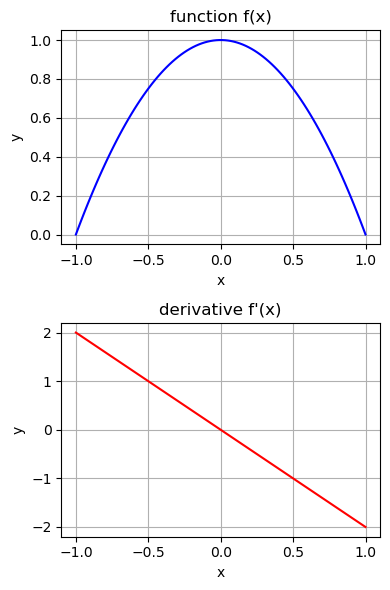

In [30]:
using PyPlot

# f(x)を二次関数として定義
f(x) = -(x + 1)*(x - 1)

# hを微小な値として設定（10のマイナス10乗）
h = 1.0e-10

# 導関数f'の近似式
fd(a) = (f(a + h) - f(a)) / h # f'だと"syntax: invalid function name "f'""となりエラー

# 関数の可視化範囲
xs = range(-1, 1, length = 100)

fig, axes = subplots(2, 1, figsize=(4, 6))

# 関数のプロット
axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

# 導関数のプロット
axes[2].plot(xs, fd.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("derivative f'(x)")

tight_layout()

### 2.4.2 Differentiation of functions of many variables

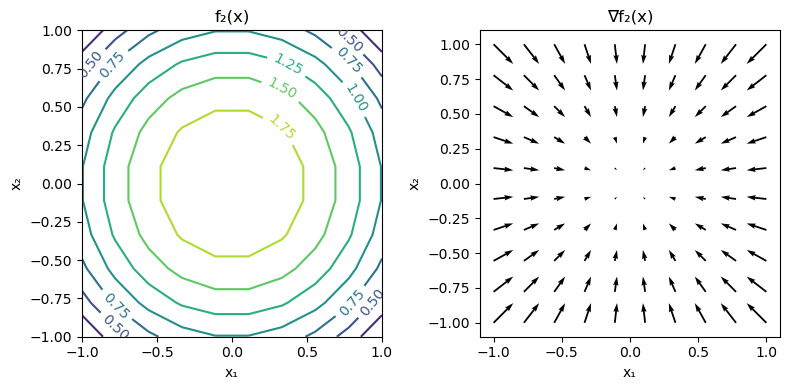

In [31]:
# グラフを可視化する際の解像度
L = 10

# f₂(x)を可視化する範囲
xs₁ = range(-1, 1, length = L)
xs₂ = range(-1, 1, length = L)

# 2変数関数の定義
f₂(x) = -(x .+ 1)'*(x .- 1)

# 2変数関数の勾配
∇f₂(x) = -2x

fig, axes = subplots(1, 2, figsize = (8, 4))

# 関数の等高線図の可視化
cs = axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs, inline = true)
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].set_title("f₂(x)")

# 勾配ベクトルの計算と可視化
vec1 = [∇f₂([x₁, x₂])[1] for x₁ in xs₁, x₂ in xs₂]
vec2 = [∇f₂([x₁, x₂])[2] for x₁ in xs₁, x₂ in xs₂]

axes[2].quiver(repeat(xs₁, 1, L), repeat(xs₂', L, 1), vec1, vec2)
axes[2].set_xlabel("x₁"), axes[2].set_ylabel("x₂")
axes[2].set_title("∇f₂(x)")

tight_layout()

In [32]:
using ForwardDiff

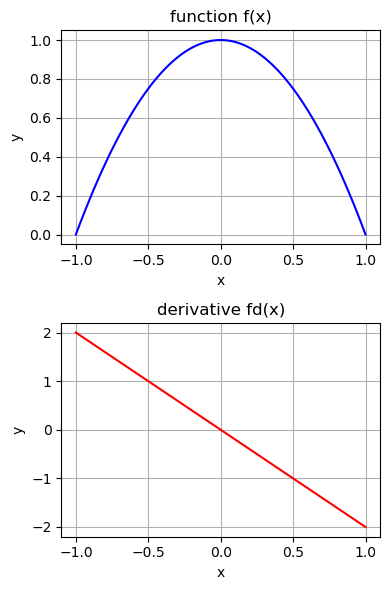

In [33]:
# 二次関数を定義
f(x) = -(x + 1)*(x - 1)

# 自動微分によって導関数fd(x)を求める（d = ')
fd(x) = ForwardDiff.derivative(f, x)

# 関数の可視化範囲
xs = range(-1, 1, length = 100)

fig, axes = subplots(2, 1, figsize = (4, 6))

# 関数のプロット
axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

# 導関数のプロット
axes[2].plot(xs, fd.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("derivative fd(x)")

tight_layout()

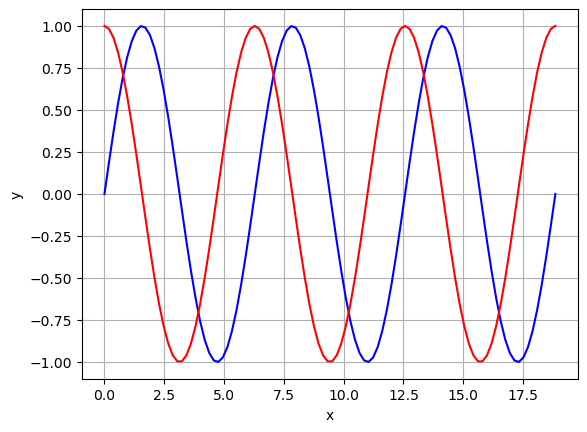

PyObject <bound method Axes.legend of <AxesSubplot:xlabel='x', ylabel='y'>>

In [34]:
fig, ax = subplots()
xs = range(0, 2pi * 3, length = 100)

# sin(x)をプロット
ax.plot(xs, sin.(xs), color = "b", label = "sin(x)")

# 導関数をプロット
ax.plot(xs, map(x -> ForwardDiff.derivative(sin, x), xs), 
    color = "r", label = "sin'(x)")
ax.grid()
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend

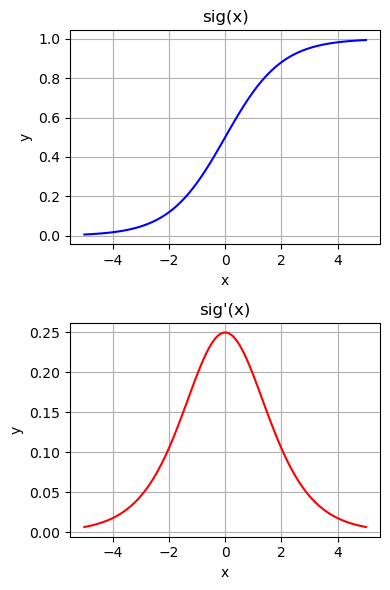

In [35]:
# シグモイド関数
sig(x) = 1 / (1 + exp(-x))

xs = range(-5, +5, length = 100)
fig, axes = subplots(2, 1, figsize = (4, 6))

# シグモイド関数をプロット
axes[1].plot(xs, sig.(xs), color = "b")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("sig(x)")
axes[1].grid()

# 導関数をプロット
axes[2].plot(xs, map(x -> ForwardDiff.derivative(sig, x), xs), color = "r")
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("sig'(x)")
axes[2].grid()

tight_layout()

## 2.5 Function optimization

1変数の連続関数に関する最大化アルゴリズム

1. 初期値 $x_1$, 最大繰り返し数 maxtier $\geqq 2$, ステップサイズ$\eta > 0$を設定する
2. $2 \leqq i \leqq $ maxtier で以下を繰り返す

$ x_i = x_{i-1} + \eta f'(x_i -1)$

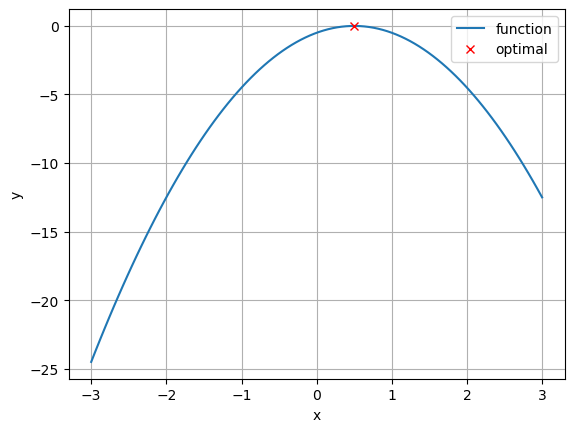

PyObject <matplotlib.legend.Legend object at 0x7f7abd374fa0>

In [36]:
# 最大値を探したい目的関数
x_opt = 0.50
f(x) = -2(x - x_opt)^2

fig, ax = subplots()
xs = range(-3, 3, length = 100)
ax.plot(xs, f.(xs), label = "function")
ax.plot(x_opt, f(x_opt), "rx", label = "optimal")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [37]:
# 1変数関数の最適化
function gradient_method_1dim(f, x_init, η, maxiter)
    # 最適化過程のパラメータを格納する配列
    x_seq = Array{typeof(x_init), 1}(undef, maxiter)
    
    # 勾配
    fd(x) = ForwardDiff.derivative(f, x)
    
    # 初期値
    x_seq[1] = x_init
    
    # メインの最適化ループ
    for i in 2:maxiter
        x_seq[i] = x_seq[i-1] + η * fd(x_seq[i-1])
    end
    
    x_seq
end

gradient_method_1dim (generic function with 1 method)

In [38]:
# 探索の初期値
x_init = -2.5

# 探索の繰り返し数
maxiter = 20

# ステップサイズ
η = 0.1

# 最適化計算を実行
x_seq = gradient_method_1dim(f, x_init, η, maxiter)
f_seq = f.(x_seq)

20-element Vector{Float64}:
 -18.0
  -6.479999999999999
  -2.3327999999999993
  -0.8398079999999998
  -0.30233087999999986
  -0.10883911679999994
  -0.03918208204799999
  -0.014105549537279988
  -0.0050779978334207915
  -0.0018280792200314835
  -0.0006581085192113332
  -0.0002369190669160795
  -8.529086408978862e-5
  -3.07047110723239e-5
  -1.1053695986036396e-5
  -3.979330554973165e-6
  -1.4325589997903394e-6
  -5.157212399245448e-7
  -1.8565964637284966e-7
  -6.683747269421776e-8

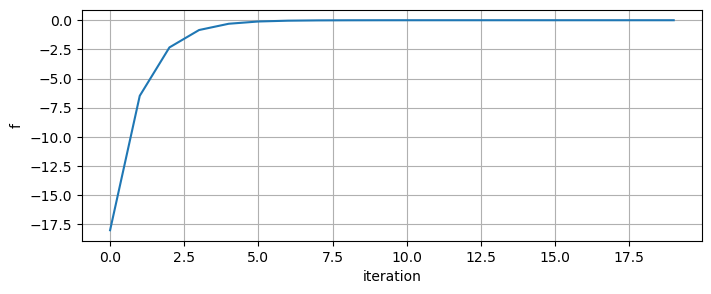

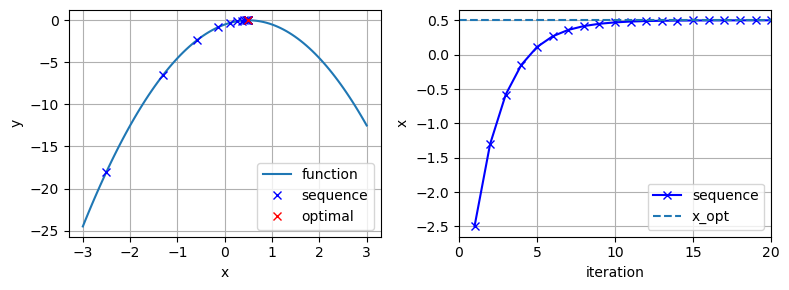

In [39]:
# 目的関数の値をステップ毎にプロット
fig, ax = subplots(figsize = (8, 3))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

fig, axes = subplots(1, 2, figsize = (8, 3))

# 関数のプロット
axes[1].plot(xs, f.(xs), label = "function")

# 探索の過程
axes[1].plot(x_seq, f.(x_seq), "bx", label = "sequence")

# 最適値
axes[1].plot(x_opt, f(x_opt), "rx", label = "optimal")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].grid()
axes[1].legend()

# 探索の過程をステップごとにプロット
axes[2].plot(1:maxiter, x_seq, "bx-", label = "sequence")
axes[2].hlines(x_opt, 0, maxiter, ls = "--", label = "x_opt")
axes[2].set_xlim([0, maxiter])
axes[2].set_xlabel("iteration"), axes[2].set_ylabel("x")
axes[2].grid()
axes[2].legend()

tight_layout()

## 2.5.2 多変数関数の勾配法

多変数の場合の数値最適化アルゴリズム

1. 初期値$x_1$，最大繰り返し数 maxiter $\geqq 2$, ステップサイズ$\eta > 0$を設定する．

2. $2 \leqq i \leqq $maxiterで以下を繰り返す．

$x_i = x_{i-1} + \eta \nabla f ({\bf{x}}_{i-1})$

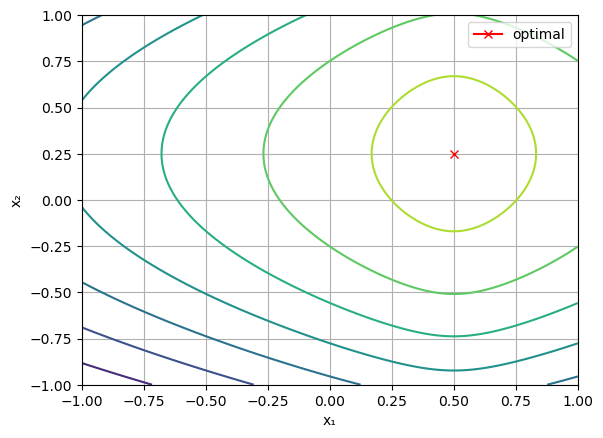

PyObject <matplotlib.legend.Legend object at 0x7f7abe505310>

In [40]:
# 多変数関数を定義
x_opt = [0.50, 0.25]
f₂(x) = -sqrt(0.05 + (x[1] - x_opt[1])^2) - (x[2] - x_opt[2])^2

# 関数を等高線図として可視化
L = 100
xs₁ = range(-1, 1, length = L)
xs₂ = range(-1, 1, length = L)
fig, ax = subplots()
ax.contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
ax.plot(x_opt[1], x_opt[2], color = "r", marker = "x", label = "optimal")
ax.set_xlabel("x₁"), ax.set_ylabel("x₂")
ax.grid()
ax.legend()

In [41]:
# 多次元関数のための勾配法
function gradient_method(f, x_init, η, maxiter)
    # 最適化過程のパラメータを格納する配列
    x_seq = Array{typeof(x_init[1]), 2}(undef, length(x_init), maxiter)
    
    # 勾配
    ∇f(x) = ForwardDiff.gradient(f, x)
    
    # 初期値
    x_seq[:, 1] = x_init
    
    # メインの最適化ループ
    for i in 2:maxiter
        x_seq[:, i] = x_seq[:, i-1] + η*∇f(x_seq[:, i-1])
    end
    
    x_seq
end

# パラメータの設定
x_init = [-0.75, -0.75]
maxiter = 20
η = 0.1

# 最適化の実行
x_seq = gradient_method(f₂, x_init, η, maxiter)
f_seq = [f₂(x_seq[:, i]) for i in 1:maxiter]

20-element Vector{Float64}:
 -2.2698425099200294
 -1.8130713587869223
 -1.4864674129221398
 -1.2435333058718216
 -1.0546304357566991
 -0.9009647514196972
 -0.7707699828580662
 -0.6569195690940037
 -0.5554903555124693
 -0.46498971917861137
 -0.3860446444970153
 -0.3212180328272999
 -0.27400717006417613
 -0.2457105046976077
 -0.23231600743801767
 -0.22703677774417294
 -0.22508176283129977
 -0.22432371767829845
 -0.2239955619536749
 -0.2238341324318122

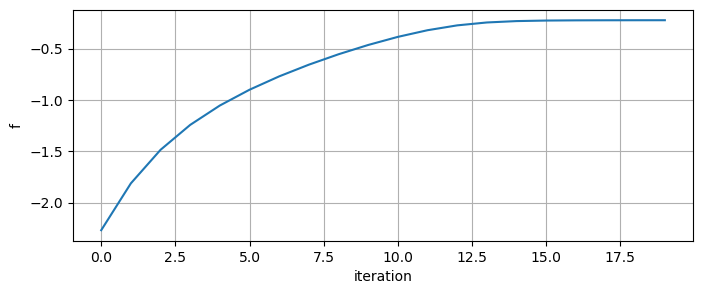

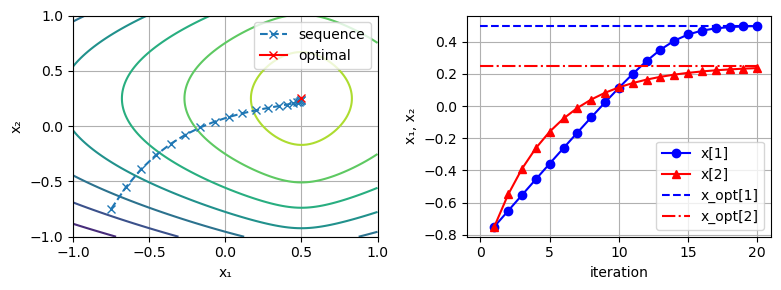

In [42]:
# 目的関数の値をステップごとにプロット
fig, ax = subplots(figsize = (8,3))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

fig, axes = subplots(1, 2, figsize = (8, 3))

# 等高線図で関数を可視化
axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')

# 最適化の過程
axes[1].plot(x_seq[1, :], x_seq[2, :], ls = "--", marker = "x", label = "sequence")
axes[1].plot(x_opt[1], x_opt[2], color = "r", marker = "x", label = "optimal")
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].grid()
axes[1].legend()

# ステップごとの最適化の過程
axes[2].plot(1:maxiter, x_seq[1,:], color = "b", marker = "o", label = "x[1]")
axes[2].plot(1:maxiter, x_seq[2,:], color = "r", marker = "^", label = "x[2]")
axes[2].hlines(x_opt[1], 0, maxiter, color = "b", ls = "--", label = "x_opt[1]")
axes[2].hlines(x_opt[2], 0, maxiter, color = "r", ls = "-.", label = "x_opt[2]")
axes[2].set_xlabel("iteration")
axes[2].set_ylabel("x₁, x₂")
axes[2].grid()
axes[2].legend()

tight_layout()

## 2.5.3 局所最適解と大域最適解

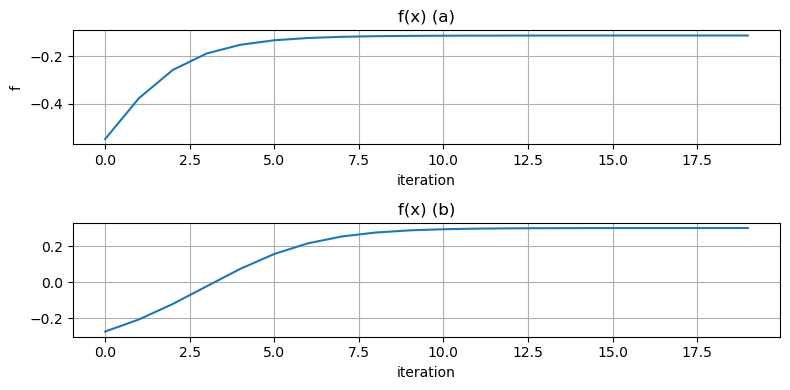

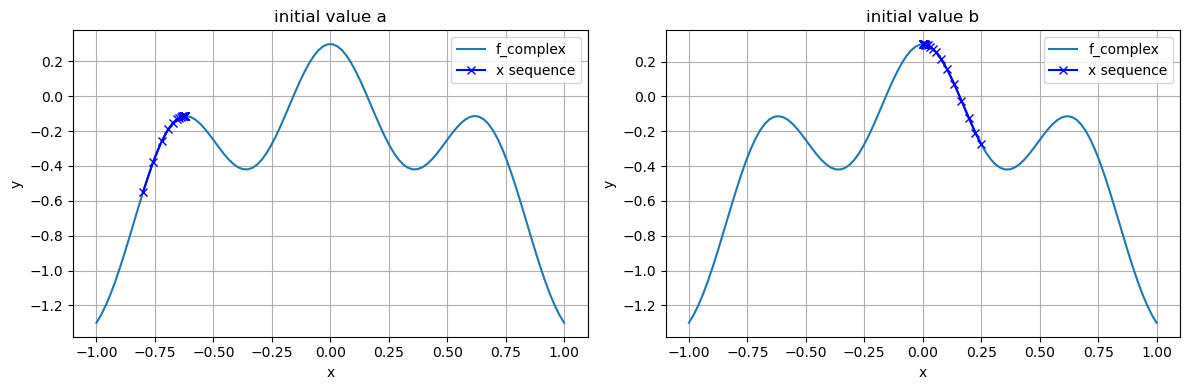

In [56]:
#目的関数の定義
f_complex(x) = 0.3*cos(3pi*x) - x^2

# 最適化のパラメータ設定
maxiter = 20
η = 0.01

# 初期値 a
x_init_a = -0.8
x_seq_a = gradient_method_1dim(f_complex, x_init_a, η, maxiter)
f_seq_a = f_complex.(x_seq_a)

# 初期値 b
x_init_b = 0.25
x_seq_b = gradient_method_1dim(f_complex, x_init_b, η, maxiter)
f_seq_b = f_complex.(x_seq_b)

# 目的関数の値をステップごとにプロット
fig, axes = subplots(2, 1, figsize = (8, 4))
axes[1].plot(f_seq_a)
axes[1].set_xlabel("iteration"), axes[1].set_ylabel("f")
axes[1].set_title("f(x) (a)")
axes[1].grid()
axes[2].plot(f_seq_b)
axes[2].set_xlabel("iteration"), axes[1].set_ylabel("f")
axes[2].set_title("f(x) (b)")
axes[2].grid()
tight_layout()

# 関数を可視化する範囲
xs = range(-1, 1, length = 100)

# 最適化の過程
fig, axes = subplots(1, 2, figsize=(12, 4))
axes[1].plot(xs, f_complex.(xs), label="f_complex")
axes[1].plot(x_seq_a, f_complex.(x_seq_a), 
            color = "b", marker = "x", label = "x sequence")
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].grid()
axes[1].set_title("initial value a")
axes[1].legend()

axes[2].plot(xs, f_complex.(xs), label="f_complex")
axes[2].plot(x_seq_b, f_complex.(x_seq_b), 
            color = "b", marker = "x", label = "x sequence")
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].grid()
axes[2].set_title("initial value b")
axes[2].legend()

tight_layout()

## 2.6 最適化によるカーブフィッティング

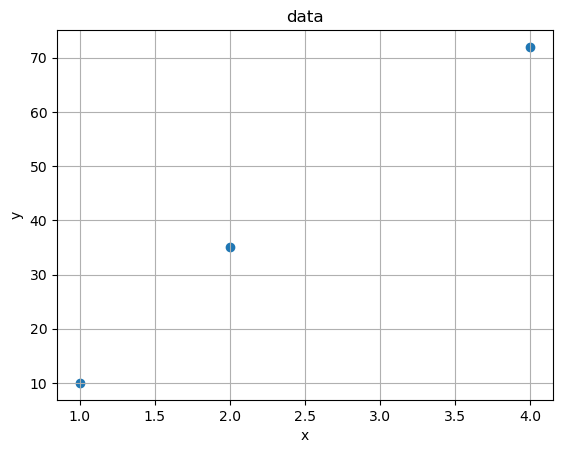

In [58]:
# 学習用の入力値集合
X_obs = [1, 2, 4]

# 学習用の出力値集合
Y_obs = [10, 35, 72]

# データの可視化
fig, ax = subplots()
ax.scatter(X_obs, Y_obs)
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.set_title("data")
ax.grid()

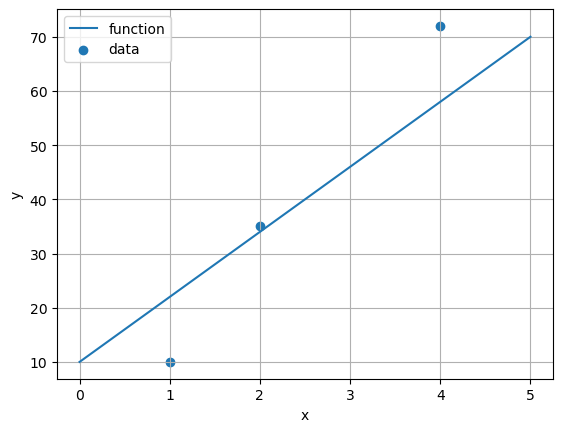

PyObject <matplotlib.legend.Legend object at 0x7f7abe5597f0>

In [60]:
# 適当な傾きパラメータおよび切片パラメータを設定
w = [12.0, 10.0]

# 予測に使う関数
f(x) = w[1]*x + w[2]

# 関数を可視化する範囲
xs = range(0, 5, length = 100)

# データと予測関数の可視化
fig, ax = subplots()
ax.plot(xs, f.(xs), label="function")
ax.scatter(X_obs, Y_obs, label="data")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

関数の値と各データとの二乗誤差（mean squared error）を最小にするように決定する．

$w_{opt} = \mathrm{argmin}_{W} E(W)$

$E(X) = \sum_{n=1}^{N} \{ y_{n} - (w_{1} x_{n} + w_{2}) \}^{2}$

In [61]:
# 誤差関数の定義
E(w) = sum([(Y_obs[n] - (w[1] * X_obs[n] + w[2]))^2
        for n in 1:length(X_obs)])

E (generic function with 1 method)

In [62]:
# 最適化するパラメータの初期値
w_init = [0.0, 0.0]

# 最適化計算の回数
maxiter = 500

# 学習率
η = 0.01

# 最適化の実行，最大化アルゴリズムなので，-Eを目的関数にする
F(w) = -E(w)
w_seq = gradient_method(F, w_init, η, maxiter)
f_seq = [F(w_seq[:,1]) for i in 1:maxiter]

500-element Vector{Float64}:
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
     ⋮
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0
 -6509.0

In [64]:
w₁, w₂ = w_seq[:, end]
println("w_1 = $(w₁), w_2 = $(w₂)")

w_1 = 20.345436819385633, w_2 = -8.465882327774901


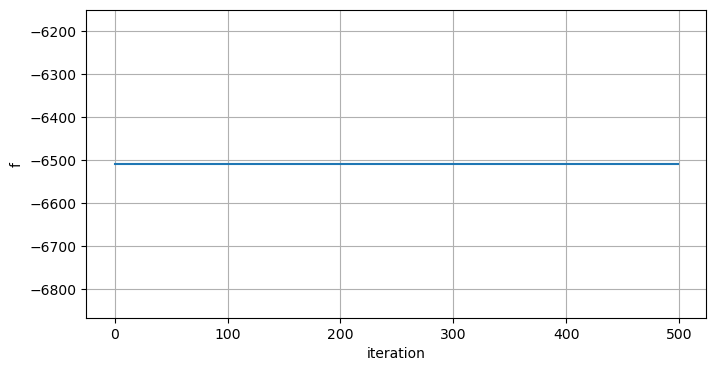

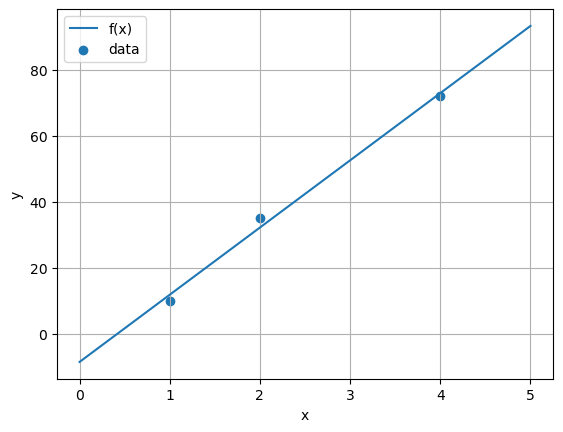

PyObject <matplotlib.legend.Legend object at 0x7f7abeb72af0>

In [67]:
# 目的関数の値をステップごとにプロット
fig, ax = subplots(figsize = (8, 4))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

# 予測に使う1次関数
f(x) = w₁*x + w₂

# 関数を可視化する範囲
xs = range(0, 5, length = 100)

# データと予測関数のプロット
fig, ax = subplots()
ax.plot(xs, f.(xs), label = "f(x)")
ax.scatter(X_obs, Y_obs, label = "data")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()